# Simple Logistic Regression

- **분류 모델**에만 사용할 수 있다.
- 분류에만 사용할 수 있는데, 왜 Regression(회귀)라는 말이 붙을까?
    - 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1사이 값으로 예측하기 위해
    - 이를 통해, 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습이다.
    - 즉, 회귀를 통한 분류라고 할 수 있다.

# 0. 라이브러리 불러오기 및 데이터 준비하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [9]:
# 데이터 읽어오기
path = "./data/iris.csv"
data = pd.read_csv(path)

data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1. 데이터 파악하기

In [10]:
# 상위 몇 개 행 확인
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [13]:
# 범주값 개수 확인
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [14]:
# 상관관계 확인
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


# 2. 데이터 전처리

**1) x, y 분리**

In [17]:
target = 'Species'

x = data.drop(target, axis=1)
y = data.loc[:, target]

x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**2) 학습용, 평가용 데이터 분리**

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

# 3. 모델링

In [19]:
# 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
# 모델 선언하기
model = LogisticRegression()

In [21]:
# 학습하기
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
# 예측하기
y_pred = model.predict(x_test)

print(y_pred[:5])
print(y_test[:5].values)

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica']
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica']


In [23]:
# 평가하기
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [31]:
# 확률값 확인하기
p = model.predict_proba(x_test)
p[:5].round(2) # 품종 3개중 어느 분류에 속할것인지 확률값을 나타낸다.

array([[0.98, 0.02, 0.  ],
       [0.27, 0.72, 0.  ],
       [0.01, 0.87, 0.12],
       [0.99, 0.01, 0.  ],
       [0.  , 0.02, 0.98]])

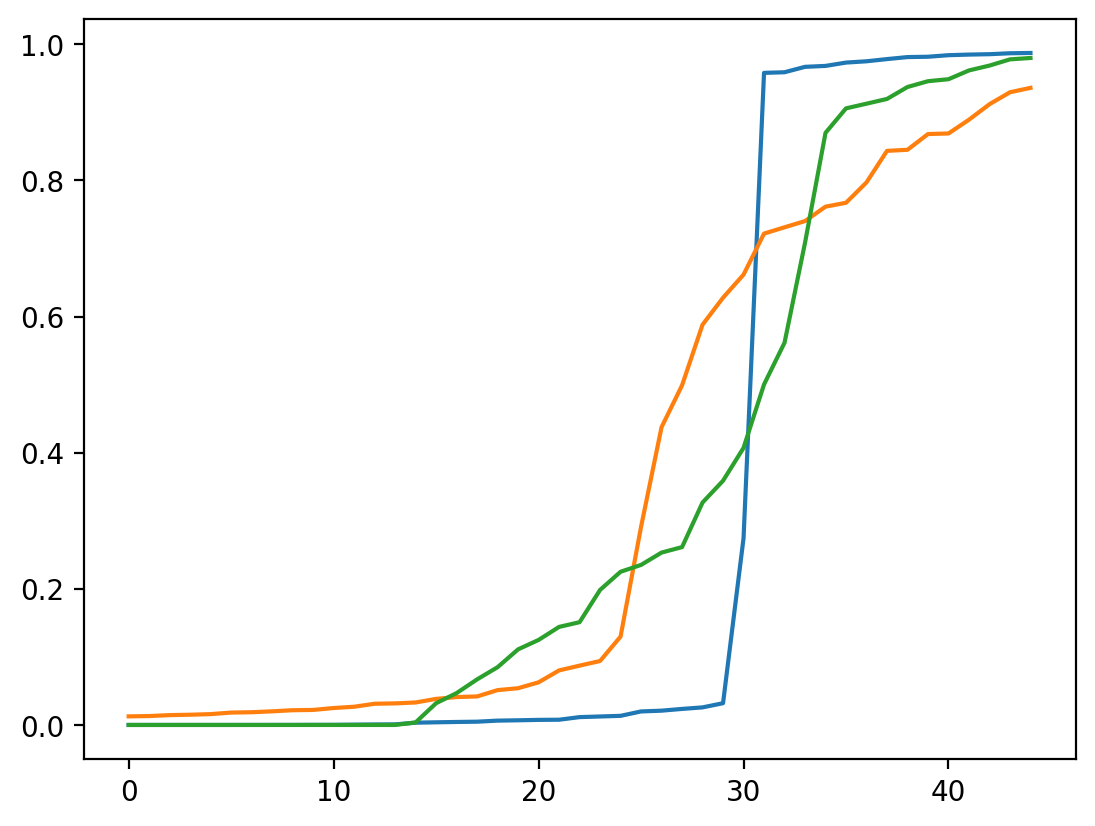

In [36]:
# 시그모이드 그래프 시각화하기

setosa = np.sort(p[:,0])
versicolor = np.sort(p[:,1])
virginica = np.sort(p[:,2])

plt.plot(setosa)
plt.plot(versicolor)
plt.plot(virginica)

plt.show()